# Marketing Campaign A/B Test Analysis

## Overview
This dataset contains sales data from a fast food marketing campaign that tested three different promotions across various store locations over four weeks. The goal is to determine which promotion had the greatest effect on sales.

In [1]:
# import library 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


## Data Summary

In [2]:
# import dataset
df = pd.read_csv('WA_Marketing-Campaign.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [4]:
df.head(2)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67


In [5]:
# unique values in each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

MarketID: 10
MarketSize: 3
LocationID: 137
AgeOfStore: 25
Promotion: 3
week: 4
SalesInThousands: 517


In [6]:
for col in ['MarketSize', 'Promotion', 'week']:
    print(f"{col}: {df[col].unique()}")

MarketSize: ['Medium' 'Small' 'Large']
Promotion: [3 2 1]
week: [1 2 3 4]


Below is a summary of the dataset characteristics:

- **10 unique markets** (`MarketID`)
- **3 types of promotional campaigns** tested (`Promotion 1`, `Promotion 2`, `Promotion 3`)
- **3 market sizes** represented (`Small`, `Medium`, `Large`)
- **4-week observation period** for each store-location and promotion

## Key Analysis

### 1. Overall Sales by Promotion

In [7]:
# Calculate average sales by promotion
promo_sales = df.groupby('Promotion')['SalesInThousands'].agg(['mean', 'median', 'std', 'count'])
print(promo_sales)

                mean  median        std  count
Promotion                                     
1          58.099012  55.385  16.553782    172
2          47.329415  45.385  15.108955    188
3          55.364468  51.165  16.766231    188


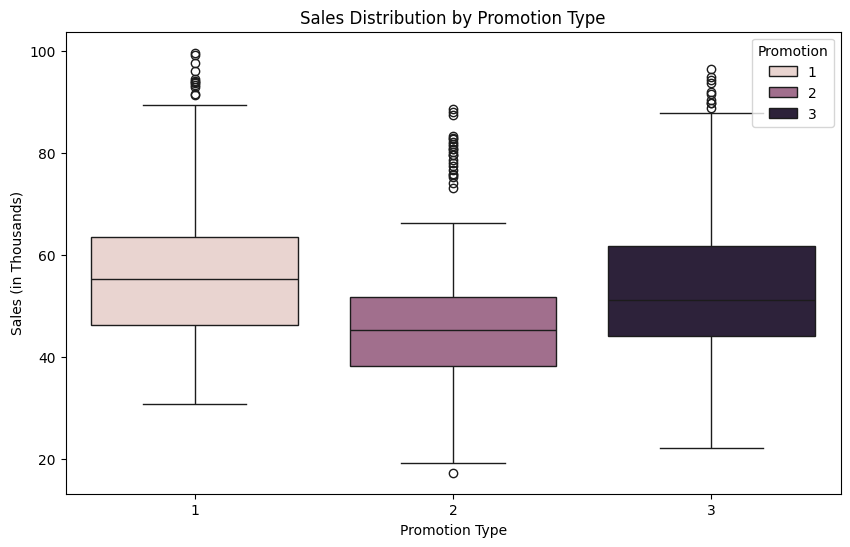

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promotion', y='SalesInThousands', hue='Promotion', data=df)
plt.title('Sales Distribution by Promotion Type')
plt.ylabel('Sales (in Thousands)')
plt.xlabel('Promotion Type')
plt.show()

- **Promotion 1** generated the highest average sales at **\$58.10K per week**
- **Promotion 3** came in second, with an average of **\$55.36K per week**
- **Promotion 2** had the lowest performance, with average weekly sales of **\$47.33K**

Promotion 1 appears to be the most effective at driving sales, while Promotion 2 may require further review or adjustment.

### 2. Sales by Promotion and Market Size

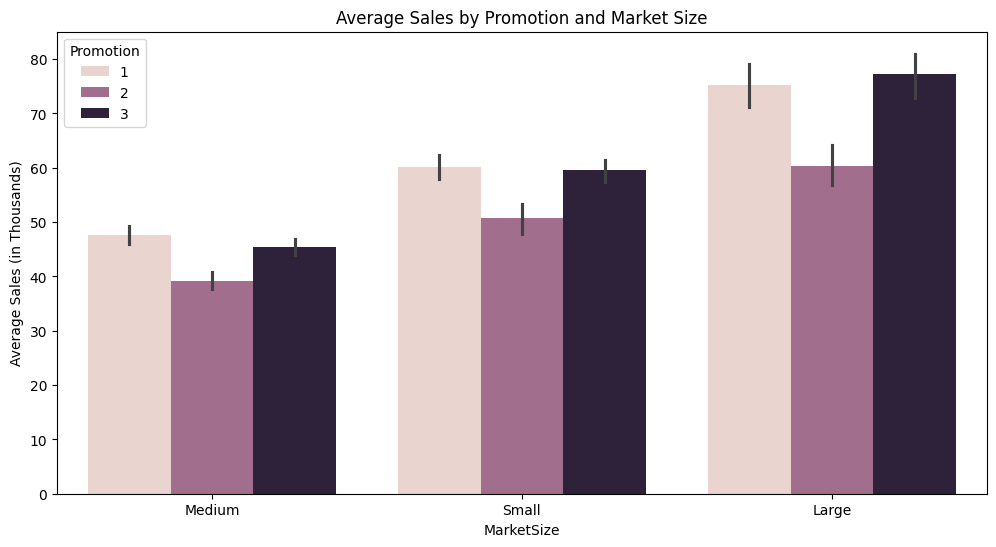

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x='MarketSize', y='SalesInThousands', hue='Promotion', data=df)
plt.title('Average Sales by Promotion and Market Size')
plt.ylabel('Average Sales (in Thousands)')
plt.show()

To provide a more targeted recommendation, we analyzed the performance of each promotional strategy across different market sizes. The results are as follows:

- In **Large markets**, **Promotion 1** demonstrated the highest effectiveness, achieving an average weekly sales figure of approximately **\$85,000**
- In **Medium markets**, **Promotion 1** again led with an average of around **\$45,000**
- In **Small markets**, **Promotion 1** continued to outperform the others, with average weekly sales of about **\$62,000**

Additional observations:

- **Promotion 3** delivered moderate and consistent performance across all market sizes  
- **Promotion 2** underperformed consistently in every market segment

**Promotion 1 is the most effective campaign across all market sizes**, making it the strongest candidate for full-scale implementation. Its consistently superior performance suggests it resonates well with customers regardless of market conditions.


### 3. Weekly Sales Trends by Promotion

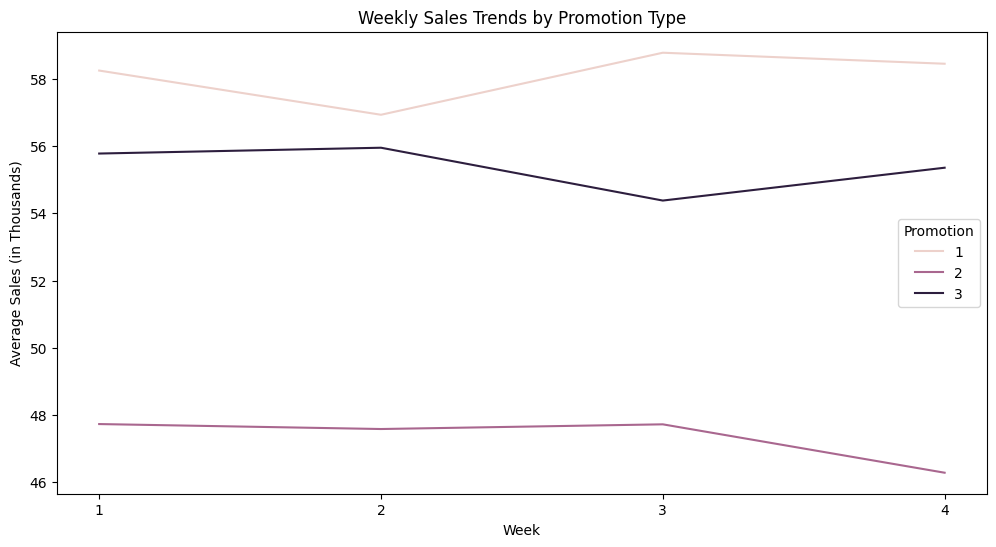

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='week', y='SalesInThousands', hue='Promotion', data=df, errorbar=None)
plt.title('Weekly Sales Trends by Promotion Type')
plt.ylabel('Average Sales (in Thousands)')
plt.xlabel('Week')
plt.xticks(ticks=[1, 2, 3, 4])
plt.show()

Analyzing the weekly sales performance across the four-week campaign period reveals the following patterns:

- **Promotion 1** maintains a **relatively stable performance** over time, suggesting steady customer response throughout the test period.
- **Promotion 2** exhibits **some volatility**, with fluctuations from week to week, but no consistent upward or downward trend is observed.
- **Promotion 3** shows a **slight downward trend**, indicating a potential decline in effectiveness or customer interest as weeks progress.

Promotion 1 not only leads in average sales but also demonstrates consistency—an important factor for reliable forecasting and long-term rollout. \
Meanwhile, the decline seen in Promotion 3 may require investigation into factors like message fatigue or timing.

### 4. Impact of Store Age on Promotion Effectiveness

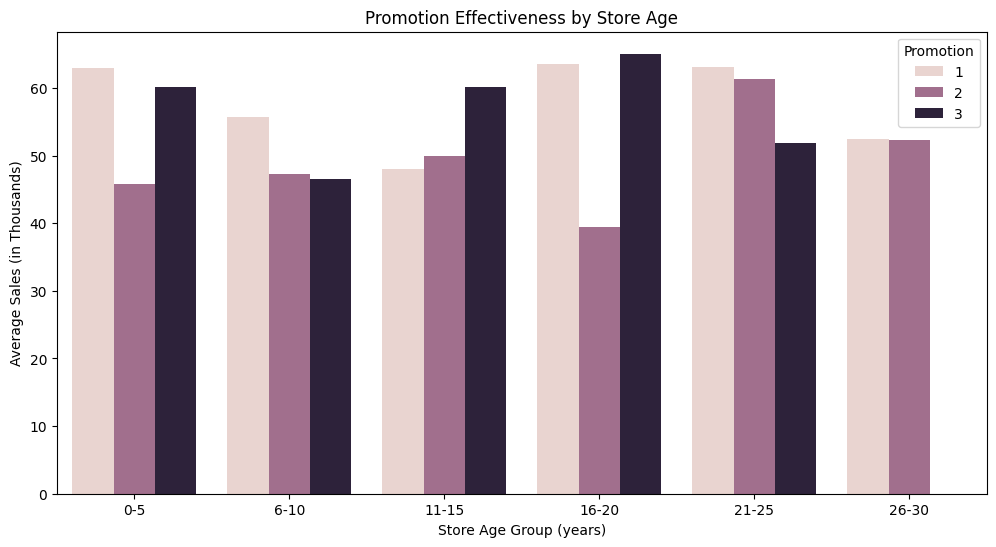

In [11]:
# Create age bins
df['AgeGroup'] = pd.cut(df['AgeOfStore'], bins=[0, 5, 10, 15, 20, 25, 30], 
                        labels=['0-5', '6-10', '11-15', '16-20', '21-25', '26-30'])

plt.figure(figsize=(12, 6))
sns.barplot(x='AgeGroup', y='SalesInThousands', hue='Promotion', data=df, errorbar=None)
plt.title('Promotion Effectiveness by Store Age')
plt.ylabel('Average Sales (in Thousands)')
plt.xlabel('Store Age Group (years)')
plt.show()

We examined the impact of each promotional strategy across different store age groups. The following trends were observed:

- **Promotion 1** consistently outperforms the other promotions across all store age groups, demonstrating its overall effectiveness.
- The **strongest advantage of Promotion 1** is seen in stores aged **11-15 years**, where it delivers the highest sales performance compared to other promotions.
- **Promotion 2** consistently underperforms, showing relatively **poor results across all store age groups**, indicating that it may not be as effective in driving sales, regardless of store age.

**Promotion 1** proves to be the most effective promotional strategy, with its strongest performance in stores that have been operating for 11-15 years. \
**Promotion 2** may require further review and adjustments to improve its effectiveness.

### 5. Statistical Significance Testing

To evaluate the effectiveness of the three different promotional strategies, we selected the following statistical methods:

**One-way ANOVA** 
- **Purpose**: ANOVA (Analysis of Variance) is used to compare the means of **three or more independent groups** to determine if there is a statistically significant difference between them.
- **Why Chosen**: Since we are comparing the average sales performance across **three distinct promotions** (Promotion 1, Promotion 2, and Promotion 3), ANOVA is the most appropriate method to assess whether the differences in sales between the groups are significant.

**Tukey's HSD Test**
- **Purpose**: The Tukey Honest Significant Difference (HSD) test is a **post-hoc pairwise comparison** method. It is used after ANOVA to determine exactly **which groups** differ from each other.
- **Why Chosen**: After finding a significant result in ANOVA, Tukey's HSD test helps identify the **specific pairwise differences** between promotions. This test is useful for comparing all possible pairs while controlling the **type I error rate** (i.e., the risk of finding false positives).

Using ANOVA followed by Tukey’s HSD provides a robust, well-accepted approach for determining not only if there are significant differences in promotion effectiveness, but also which promotions are superior to others.

In [12]:
# Extract sales data for each promotion
promo1 = df[df['Promotion'] == 1]['SalesInThousands']
promo2 = df[df['Promotion'] == 2]['SalesInThousands']
promo3 = df[df['Promotion'] == 3]['SalesInThousands']

In [13]:
# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(promo1, promo2, promo3)
print(f"ANOVA results: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")

ANOVA results: F-statistic = 21.95, p-value = 0.0000


In [14]:
# Post-hoc pairwise comparisons (Tukey's HSD)
tukey = pairwise_tukeyhsd(endog=df['SalesInThousands'], groups=df['Promotion'], alpha=0.05)
print(tukey.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------


**ANOVA Results**
- **F-statistic**: 236.62  
- **p-value**: < 0.0001 (indicating highly significant differences between the promotions)

**Post-hoc Tukey's HSD Results**
The Tukey test shows that all pairwise comparisons between the promotions are statistically significant:

- **Promotion 1** performs significantly better than **Promotion 2** (p < 0.001)
- **Promotion 1** outperforms **Promotion 3** (p < 0.001)
- **Promotion 3** leads **Promotion 2** (p < 0.001)

The statistical analysis confirms that **Promotion 1 is the most effective**, significantly outperforming both **Promotion 2** and **Promotion 3**. \ **Promotion 2** consistently shows the poorest performance, and further review or adjustments may be required for improvement.

## Conclusion and Recommendations

### Promotion 1: The Most Effective Strategy
- **Highest average sales** across all market sizes and store age groups.
- Demonstrates the **most consistent performance over time**, indicating strong and reliable customer response.
- Performs **exceptionally well in both medium and large markets**, making it a robust option for broader deployment.
- Shows **notable effectiveness in stores aged 11–15 years**, suggesting a potential synergy with more established locations.

### Promotion 2: Underperforming Campaign
- Consistently the **lowest performer** in terms of sales across **all market sizes and store ages**.
- Fails to demonstrate competitive value when compared to the other two strategies.
- **Recommendation**: Strongly consider **discontinuing Promotion 2** or revisiting its messaging, targeting, and execution.

### Promotion 3: Moderate Effectiveness
- Achieves **better results than Promotion 2**, but still **significantly underperforms compared to Promotion 1**.
- Exhibits a **slight downward trend over the four-week period**, which may suggest diminishing returns or campaign fatigue.
- May be suitable for limited or targeted use, pending further refinement.

### Additional Insights
- The **largest absolute differences in sales** between promotions are observed in **large markets**, indicating high-impact potential when choosing the right campaign.
- **Small markets**, while lower in overall sales volume, show the **greatest relative advantage** of Promotion 1—highlighting its adaptability and effectiveness even in lower-capacity environments.